In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aviachipta-narxini-bashorat-qilish/train_data.csv
/kaggle/input/aviachipta-narxini-bashorat-qilish/test_data.csv
/kaggle/input/aviachipta-narxini-bashorat-qilish/sample_solution.csv


Kutubxonlarni chaqirish

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn # ML models
import matplotlib.pyplot as plt # graphic visualisetion
import seaborn as sns

Malumotni yuklash va o'rganish

In [3]:
data = pd.read_csv('/kaggle/input/aviachipta-narxini-bashorat-qilish/train_data.csv', index_col=0)
data.head(7)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
6,Air_India,AI-636,Delhi,Afternoon,one,Morning,Chennai,Business,20.42,5,45257
7,Vistara,UK-834,Chennai,Evening,one,Morning,Mumbai,Economy,18.42,20,5054


In [4]:
data.info() # nan qiymatlar yo'q , Categorical ustunlarni o'zgartirish kerak

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,20000.0,12.177627,7.157944,0.83,6.83,11.25,16.08,38.58
days_left,20000.0,25.924150,13.624874,1.00,14.00,26.00,38.00,49.00
price,20000.0,20960.281700,22775.459535,1105.00,4783.00,7425.00,42521.00,114523.00


In [6]:
# flight ustunini taslab yuboramiz, predictionga tasir qilmaydi
data.drop(['flight'], axis=1, inplace=True) 

Visualisation and Preparetion

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


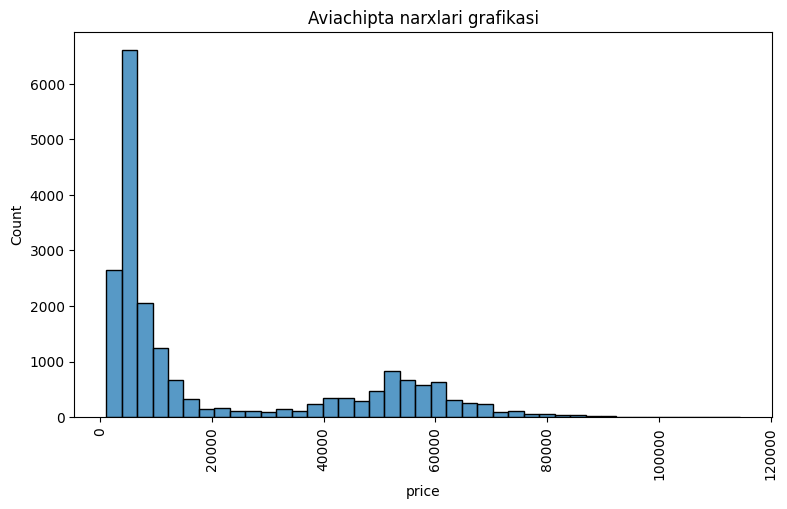

In [7]:
# histplot yordamida Aviachipta narxlari grafikasi chizish
plt.figure(figsize=(9,5))
sns.histplot(data.price)
plt.title('Aviachipta narxlari grafikasi')
plt.xticks(rotation=90)
plt.show()

In [8]:
#chipta narxi 70000 dan kam bo'lgan qatorlarni tashlab yuboramiz
df = data[data['price'] < 70000]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


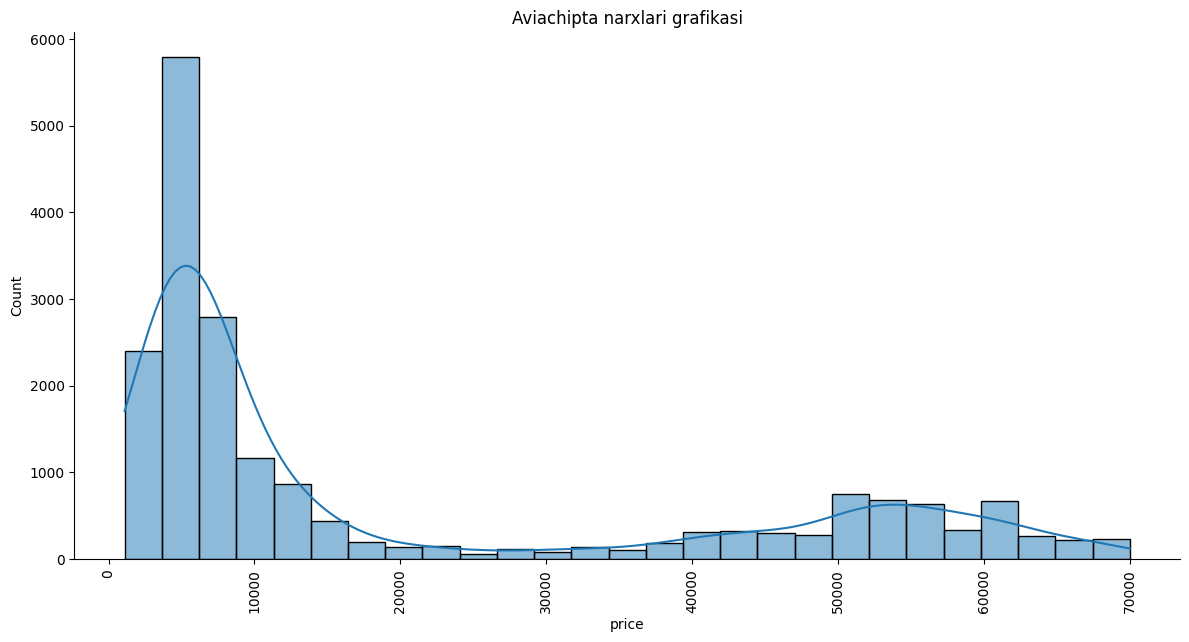

In [9]:
# displot yordamida Distribution va KDE jamlab Aviachipta narxlari grafikasi chizish
sns.displot(data=df, x='price', kde=True, height=6, aspect=2)
plt.title('Aviachipta narxlari grafikasi')
plt.xticks(rotation=90)
plt.show()

Preparetion for ML

In [10]:
# df ni train test qismga ajratish
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2 , random_state=42)

#Lebelni y ga saqlab aratib olish
X_train = train_set.drop('price', axis=1)
Y = train_set['price'].copy()
Y_test = test_set['price'].copy()

Pipeline yaratish

In [11]:
# Pipeline uchun kerakli kutubxonalar
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# sonlar bilan ishlovchi pipeline
num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('std_scaler', StandardScaler())
])

num_attribs = ['duration', 'days_left']
cat_attribs1 = ['source_city', 'destination_city', 'departure_time', 'stops']
cat_attribs2 = ['class', 'airline']

# full pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat1', OneHotEncoder(), cat_attribs1),
    ('cat2', OrdinalEncoder(), cat_attribs2),
])
 
# X_train ni full pipelinedan o'tkazamiz
X_prepared = full_pipeline.fit_transform(X_train)

Machine Learning 

Linear Regression 

In [12]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X_prepared, Y)

LinearRegression()

Modelni baholaymiz

In [13]:
X_test = test_set.drop('price', axis=1)
X_test_prepared = full_pipeline.transform(X_test)

y_predicted = LR_model.predict(X_test_prepared)

In [14]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(Y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

5882.440646649982


Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, Y)

RandomForestRegressor()

In [16]:
# modelni baholash
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(Y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

3177.4411557321496


DecisionTree

In [17]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, Y)

DecisionTreeRegressor()

In [18]:
# modelni baholash
y_predicted = Tree_model.predict(X_test_prepared)

lin_mse = mean_squared_error(Y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

4145.742707342224


Eng yaxshi natija Random Forest algaritmida : 3181.089484648247

Test datani yuklash

In [19]:
test_data = pd.read_csv('/kaggle/input/aviachipta-narxini-bashorat-qilish/test_data.csv', index_col=0)

# test datani pipelinedan o'tkazamiz
X_test_prepared = full_pipeline.transform(test_data)

# RF model orqali predict qilamiz
y_predicted = RF_model.predict(X_test_prepared)

solution_data = pd.DataFrame({"id" : np.arange(1, len(y_predicted)+1), 'price': y_predicted})

In [20]:
# id ustunini index qilish
solution_data.set_index('id')

,price
id,
1,52380.61
2,59994.99
3,22636.68
4,2576.29
5,5584.40
...,...
4996,59640.35
4997,4390.89
4998,50279.54


In [21]:
# csv faylga saqlash
solution_data.to_csv('solution.csv')